In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [2]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


In [8]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]
    val = 0
    for i, (dx, dy) in enumerate(offsets):
        val += get_pixel(img, center, x + dx, y + dy) * (1 << i)
    return val


In [10]:
path = 'ronaldo.jpg'
img_bgr = cv2.imread(path, 1)
height, width, _ = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)


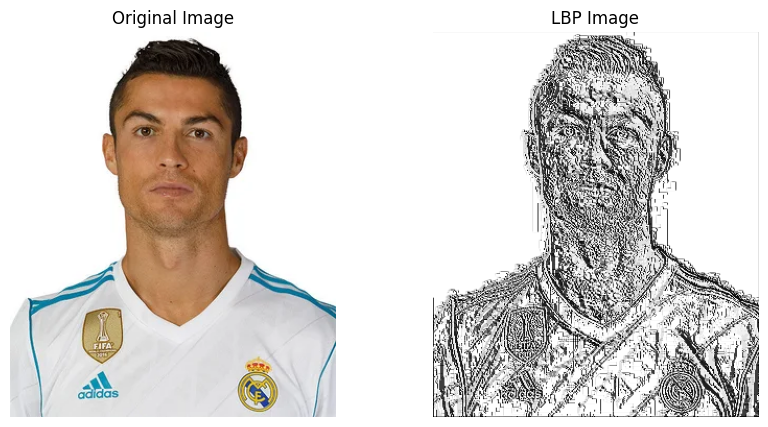

LBP Program is finished


In [12]:
# Menampilkan Gambar

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_lbp, cmap="gray")
axes[1].set_title("LBP Image")
axes[1].axis("off")

plt.show()

print("LBP Program is finished")